### Name - Bolonghe B.P.M
### Index No - 190095C
### GitHub repository - https://github.com/Pasindu-Manodara/Image-Processing-Home-Work-Exercise.git

### Blobs
Question1

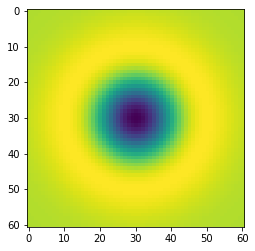

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

sigma =10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) +Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))

plt.imshow(log)

Question 2

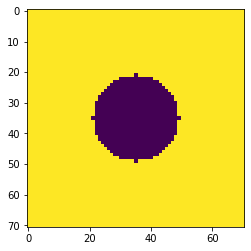

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

w,h = 71,71
hw = w//2
hh = h//2


f= np.ones((h,w),dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))

r = w//5
f*= X**2+Y**2 > r**2
plt.imshow(f)

(35, 35, 5)
10


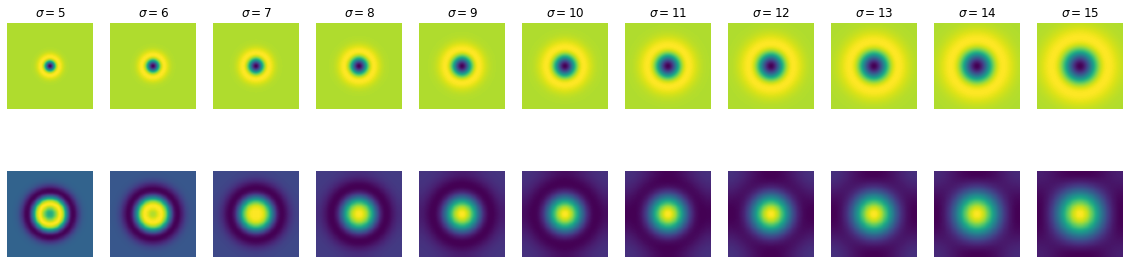

In [6]:
s = 11
fig, ax=plt.subplots(2,s,figsize=(20,5))
scale_space = np.empty((h,w,s),dtype=np.float32)
sigmas = np.arange(5,16,1)
for i,sigma in enumerate(np.arange(5,16,1)):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw,log_hw+1,1),np.arange(-log_hw,log_hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) +Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i]=f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')
  

indices = np.unravel_index(np.argmax(scale_space,axis=None),scale_space.shape)
print(indices)
print(sigmas[indices[2]])

Question 3

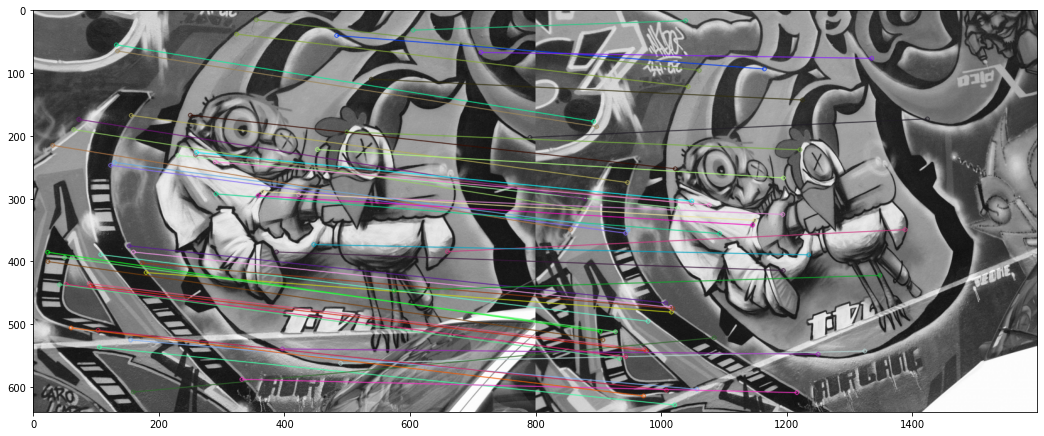

(<matplotlib.image.AxesImage at 0x2a64ca3fc10>, None)

In [7]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\coding assignments\Exercise_5\img1.ppm')  
img2 = cv2.imread('D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\coding assignments\Exercise_5\img2.ppm') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(18,16))
plt.imshow(img3),plt.show()

### Fitting Basics

Question 4

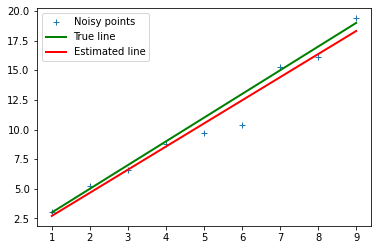

In [28]:
#least_square line fitting

m = 2 # Line equation : y = m*x + c . m i s the slop e . c i s the int e r c ept .
c = 1
x = np.arange (1 ,10 , 1)
np.random.seed(45)
sigma = 1
noise = np.random.randn(len(x))
o = np.zeros(x.shape)
# o[=1] = 20
y = m*x +c+ noise + o
n = len(x)
X = np.concatenate([x.reshape(n,1),np.ones((n,1))],axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot(x,y,'+',label='Noisy points')
plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1]+c],color='g',linewidth=2,label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar,mstar*x[-1]+cstar],color='r',linewidth=2,label=r'Estimated line')
plt.legend()


Question 5

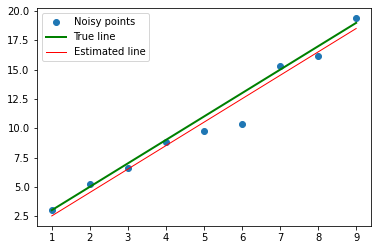

In [35]:

m = 2 
c = 1
x = np.arange (1 ,10 , 1)
sigma = 1
np.random.seed(45)
noise = sigma*np.random.randn(len(x))
o = np.zeros ( x.shape )
# o [=1] = 20
y = m*x + c + noise + o
n = len(x)
u11 = np.sum((x-np.mean(x))**2)
u12 = np.sum((x-np.mean(x))*(y-np.mean(y)))
u21=u12
u22 = np.sum((y-np.mean(y))**2)
U = np.array([[u11,u12],[u21,u22]])
W,V  =np.linalg.eig(U)
ev_corresponding_to_smallest_ev = V[:,np.argmin(W)]
a = ev_corresponding_to_smallest_ev[0]
b = ev_corresponding_to_smallest_ev[1]
d = a*np.mean(x)+b*np.mean(y)
mstar =-a/b
cstar = d/b

plt.plot(x,y,'o',label = "Noisy points")
plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1]+c],color = 'g',linewidth=2,label = 'True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar,mstar*x[-1]+cstar],color = 'r',linewidth=1,label = 'Estimated line')
plt.legend()